## **일자리와 부동산의 관계**
- 양질의 일자리가 있어야 사람이 모이고, 모인 사람들이 살 집이 필요하므로 부동산 수요가 늘어남
    - 양질의 일자리가 집중된 지역과 얼마나 가까운지, 교통이 잘 연결돼 있는지도 중요한 요소

In [59]:
# [예제 4.27] 지역고용통계 데이터 읽어오기

import pandas as pd

# job_path = r'C:\Users\JK\Desktop\부동산 데이터\지역고용통계.xls'
job_path = r'../../118_DT_118N_MONA39_20250114165939.csv'
job_raw = pd.read_csv(job_path, encoding='cp949')

In [61]:
job_raw

,지역별,산업별,시점,전체종사자[명],전체종사자(RSE)[%],빈일자리[명],빈일자리(RSE)[%],빈일자리율[%],빈일자리율(RSE)[%],입직자[명],입직자(RSE)[%],입직률[%],입직률(RSE)[%],이직자[명],이직자(RSE)[%],이직률[%],이직률(RSE)[%],Unnamed: 17
0,서울특별시 종로구,전산업,2011. 1/2,205752,-,940,-,0.5,-,9527,-,4.9,-,7236,-,3.7,-,NaN
1,서울특별시 종로구,전산업,2011. 2/2,201193,-,1363,-,0.7,-,7419,-,3.9,-,6131,-,3.2,-,NaN
2,서울특별시 종로구,전산업,2012. 1/2,200765,-,1096,-,0.6,-,8741,-,4.5,-,15078,-,7.8,-,NaN
3,서울특별시 종로구,전산업,2012. 2/2,199718,-,1288,-,0.7,-,5882,-,3.1,-,6878,-,3.6,-,NaN
4,서울특별시 종로구,전산업,2013. 1/2,197937,-,1875,-,1.0,-,9019,-,4.8,-,7011,-,3.7,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,제주도 서귀포시,전산업,2015. 2/2,40312,-,1320,-,3.3,-,2192,-,5.7,-,1848,-,4.8,-,NaN
3202,제주도 서귀포시,전산업,2016. 1/2,41340,-,1031,-,2.6,-,1463,-,3.8,-,1395,-,3.6,-,NaN
3203,제주도 서귀포시,전산업,2016. 2/2,42952,-,1174,-,2.8,-,1712,-,4.3,-,1456,-,3.6,-,NaN
3204,제주도 서귀포시,전산업,2017. 1/2,44074,NaN,950,NaN,2.2,NaN,2092,NaN,5.0,NaN,1645,NaN,4.0,NaN,NaN


In [31]:
# [예제 4.28] 데이터프레임 다듬기

job_data = job_raw[job_raw['산업별'] == '전산업']
job_data = job_data[['지역별', '전체종사자[명]']]
job_data.columns = ['지역명',  '고용자수']

In [33]:
def get_sido(x):
    temp = x.split(' ')[0]
    if len(temp) != 4:
        return temp[:2]
    else:
        return temp[0] + temp[2]

job_data['시도'] = job_data['지역명'].apply(get_sido)
job_data['구군'] = job_data['지역명'].apply(lambda x: x.split(' ')[1])

In [69]:
# [예제 4.30] 지역고용통계 전처리 과정 정리해서 함수화

def job_preprocessing(path):
    job_raw = pd.read_csv(path, encoding='cp949')
    job_data = job_raw[job_raw['산업별'] == '전산업']
    job_data = job_data[['지역별', '전체종사자[명]']]
    job_data.columns = ['지역명',  '고용자수']
    
    def get_sido(x):
        temp = x.split(' ')[0]
        if len(temp) != 4:
            return temp[:2]
        else:
            return temp[0] + temp[2]

    job_data['시도'] = job_data['지역명'].apply(get_sido)
    job_data['구군'] = job_data['지역명'].apply(lambda x: x.split(' ')[1])
    
    return job_data

In [83]:
# [예제 4.31] 세대수 엑셀 데이터 읽어오기

# house_n_path = r'C:\Users\JK\Desktop\부동산 데이터\행정구역_시군구_별_주민등록세대수_20190107134842.xlsx'
house_n_path = r'../../행정구역_시군구_별_주민등록세대수_20190107134842.xlsx'
house_n_raw = pd.read_excel(house_n_path)

C:\Users\laiep\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [39]:
# [예제 4.32] 세대수 데이터프레임에서 시도명 고치기

house_n_raw.columns = ['시도', '구군', '세대수']

big_col = []
for num, temp in enumerate(house_n_raw['시도']):
    if pd.isna(temp) :
        big_col.append(big_col[num-1])
    else:
        big_col.append(temp)

house_n_raw['시도'] = big_col


In [41]:
# [예제 4.33] 세대수 데이터프레임에서 시도명 줄임말로 고치기

def get_sido(x):
    if len(x) != 4:
        return x[:2]
    else:
        return x[0] + x[2]

house_n_raw['시도'] = house_n_raw['시도'].apply(get_sido)
house_n_data = house_n_raw[house_n_raw['구군'] != '소계']

In [63]:
# [예제 4.34] 세대수 데이터 전처리 과정 함수화(ch04/ 4.2 일자리.ipynb)

def house_number_preprocessing(path):
    house_n_raw = pd.read_excel(path)
    house_n_raw.columns = ['시도', '구군', '세대수']

    big_col = []
    for num, temp in enumerate(house_n_raw['시도']):
        if pd.isna(temp) :
            big_col.append(big_col[num-1])
        else:
            big_col.append(temp)

    house_n_raw['시도'] = big_col
    
    def get_sido(x):
        if len(x) != 4:
            return x[:2]
        else:
            return x[0] + x[2]

    house_n_raw['시도'] = house_n_raw['시도'].apply(get_sido)
    house_n_data = house_n_raw[house_n_raw['구군'] != '소계']
    
    return house_n_data

In [95]:
# [예제 4.35] 시도 단위로 고용자수 보기

job_path = r'../../118_DT_118N_MONA39_20250114165939.csv'
job_df = job_preprocessing(job_path)

job_sido = job_df.groupby('시도').sum(numeric_only=True)
job_sido = job_sido.sort_values(by='고용자수', ascending=False)

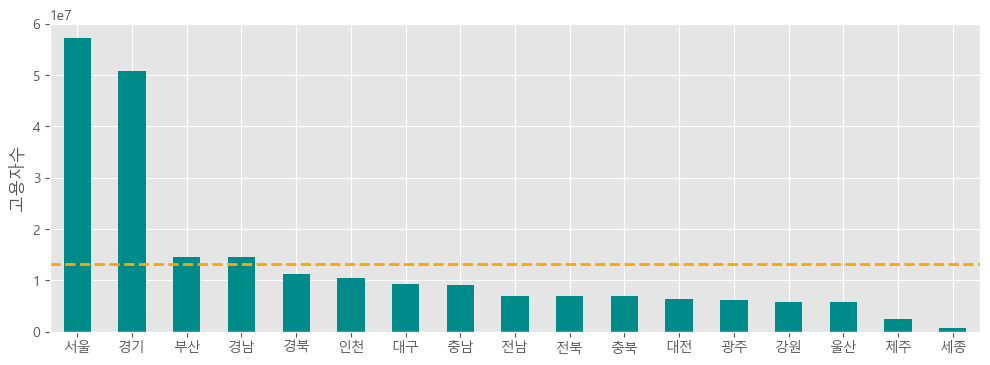

In [97]:
# [예제 4.36] 시도 단위의 고용자수를 막대 그래프로 보기 

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 맥OS인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
# rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(12, 4))
job_sido['고용자수'].plot(kind='bar', color='darkcyan')
plt.axhline(y=job_sido['고용자수'].mean(), color='orange', linewidth=2, ls='--')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('고용자수')
plt.show()

In [107]:
# [예제 4.37] 세대수 데이터 추가

house_n_df = house_number_preprocessing(house_n_path)

job_sido['세대수'] = house_n_df.groupby('시도').sum(numeric_only=True).loc[job_sido.index]
job_sido['세대수대비고용'] = job_sido['고용자수']/job_sido['세대수'] * 100

C:\Users\laiep\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


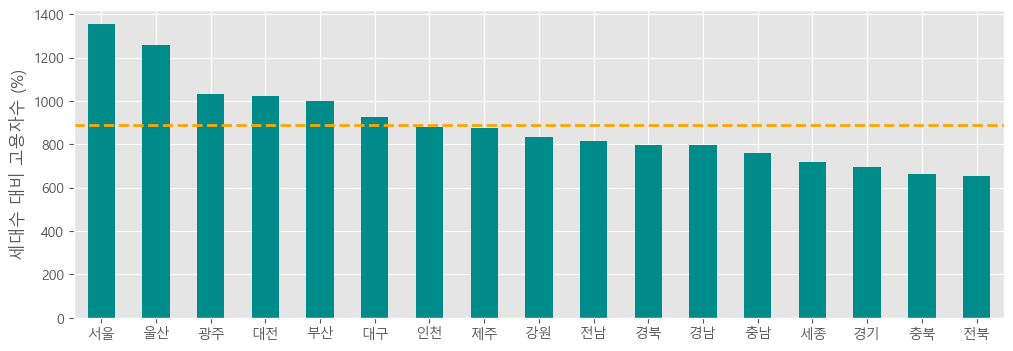

In [111]:
# [예제 4.38] 시도 단위 세대구 대비 고용비율 막대 그래프로 보기

plt.figure(figsize=(12, 4))
job_sido.sort_values(by='세대수대비고용', ascending=False)['세대수대비고용'].plot(kind='bar', color='darkcyan')
plt.axhline(y=job_sido['세대수대비고용'].mean(), color='orange', linewidth=2, ls='--')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('세대수 대비 고용자수 (%)')
plt.show()

In [113]:
# [예제 4.39] 평균 아파트 매매가격 가져오기

def gamjungwon_price_preprocessing(path):
    row_price = pd.read_excel(path, skiprows=10)
    
    big_col = []
    for num, temp in enumerate(row_price['지 역']):
        if pd.isna(temp) :
            big_col.append(big_col[num-1])
        else:
            big_col.append(temp)


    small_col = []
    for num in range(len(row_price)):
        temp_list = list(row_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[num])
        for temp in temp_list[3::-1]:
            if not pd.isna(temp):
                small_col.append(temp)
                break

    row_price.index = [big_col, small_col]
    
    transposed_price = row_price.drop(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1).T
    
    time_index = []
    for time in transposed_price.index:
        temp = time.split(' ')
        time_index.append(temp[0][:-1]+'.'+temp[1][:-1])

    transposed_price.index = pd.to_datetime(time_index)
    
    return transposed_price


price_path =  r'../../평균매매가격_아파트.xlsx'
price_df = gamjungwon_price_preprocessing(price_path)

C:\Users\laiep\AppData\Local\Temp\ipykernel_10840\33899414.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transposed_price.index = pd.to_datetime(time_index)


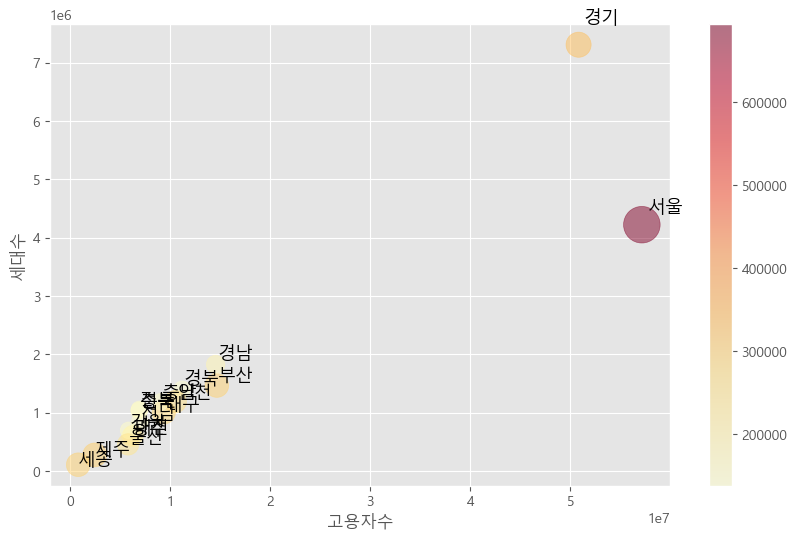

In [115]:
# [예제 4.40] 고용자수, 세대수, 평균 아파트 매매가격 scatter 그래프로 나타내기

sido_list = []
for i in job_sido.index:
    sido_list.append(price_df.loc['2018-6-1'][i][i])
      
job_sido['평균매매가격'] = sido_list

plt.figure(figsize=(10, 6))
plt.scatter(job_sido['고용자수'], job_sido['세대수'], c=job_sido['평균매매가격'], s=job_sido['평균매매가격']*0.001, cmap="YlOrRd", alpha=0.5 )
plt.xlabel('고용자수')
plt.ylabel('세대수')
for name in job_sido.index:
    plt.text(job_sido['고용자수'][name]*1.01, job_sido['세대수'][name]*1.05, name, fontsize=13)

plt.colorbar()
plt.show()

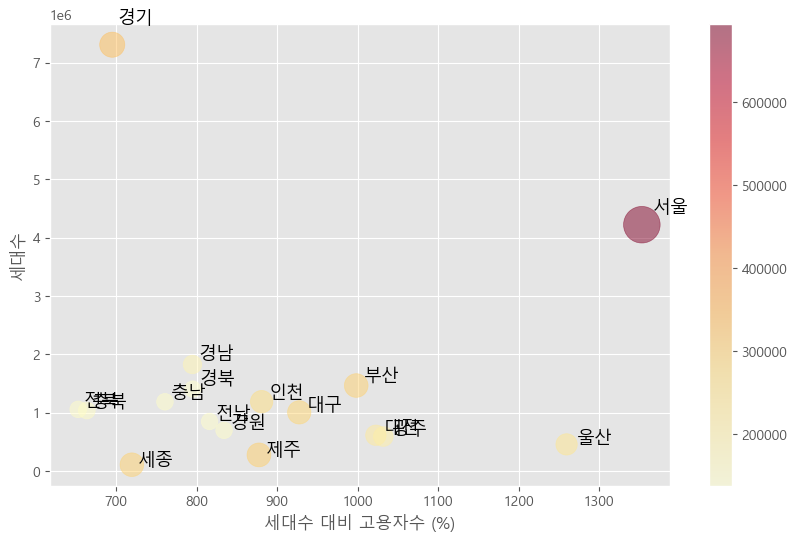

In [117]:
# [예제 4.41] 세대수 대비 고용비율, 세대수, 평균 아파트 매매가격 scatter 그래프로 나타내기

plt.figure(figsize=(10, 6))
plt.scatter(job_sido['세대수대비고용'], job_sido['세대수'], c=job_sido['평균매매가격'], s=job_sido['평균매매가격']*0.001, cmap="YlOrRd", alpha=0.5 )
plt.xlabel('세대수 대비 고용자수 (%)')
plt.ylabel('세대수')
for name in job_sido.index:
    plt.text(job_sido['세대수대비고용'][name]*1.01, job_sido['세대수'][name]*1.05, name, fontsize=13)

plt.colorbar()
plt.show()

In [121]:
# [예제 4.42] 서울시 고용자수, 세대수, 평균 매매가격 데이터프레임 만들기

local = '서울'

job_gugun = job_df[job_df['시도']==local].groupby('구군').sum()
job_gugun['세대수'] = house_n_df[house_n_df['시도'] == local].groupby('구군').sum(numeric_only=True).loc[job_gugun.index]
job_gugun['세대수대비고용'] = job_gugun['고용자수']/job_gugun['세대수'] * 100
job_gugun['평균매매가격'] = price_df.loc['2018-6-1'][local][job_gugun.index]
job_gugun = job_gugun.dropna()

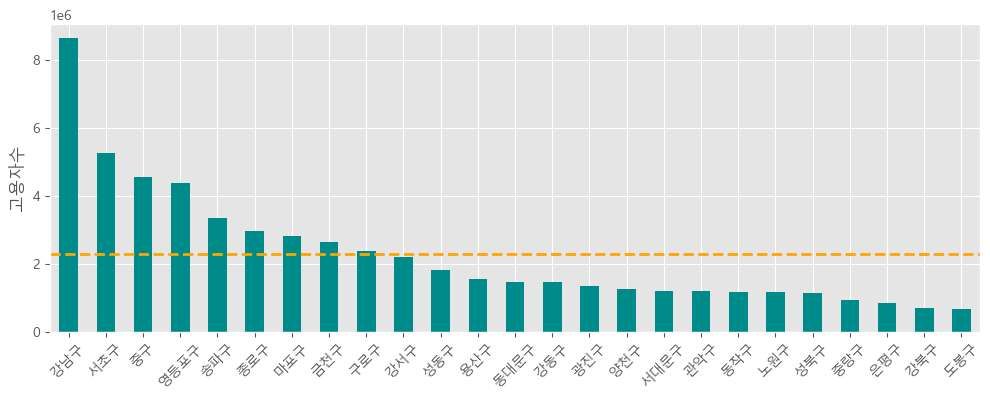

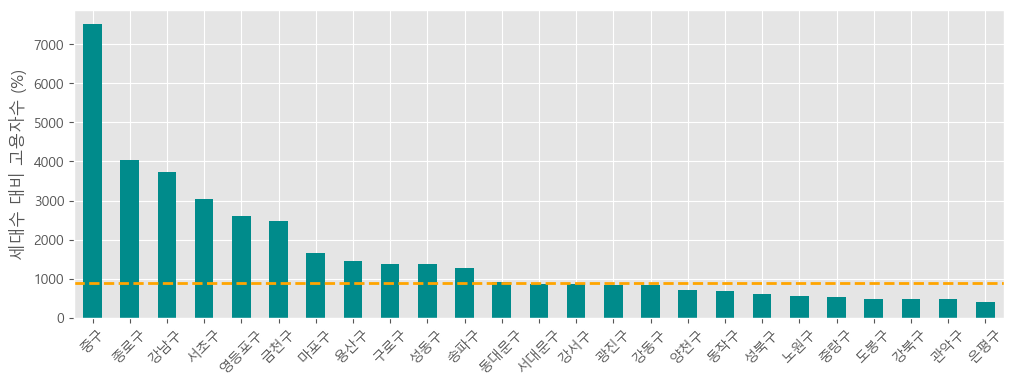

In [123]:
# [예제 4.43] 서울시의 고용자수, 세대수 대비 고용비율 막대 그래프 그리기

plt.figure(figsize=(12, 4))
job_gugun.sort_values(by='고용자수', ascending=False)['고용자수'].plot(kind='bar', color='darkcyan')
plt.axhline(y=job_gugun['고용자수'].mean(), color='orange', linewidth=2, ls='--')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('고용자수')
plt.show()

plt.figure(figsize=(12, 4))
job_gugun.sort_values(by='세대수대비고용', ascending=False)['세대수대비고용'].plot(kind='bar', color='darkcyan')
plt.axhline(y=job_sido['세대수대비고용'].mean(), color='orange', linewidth=2, ls='--')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('세대수 대비 고용자수 (%)')
plt.show()

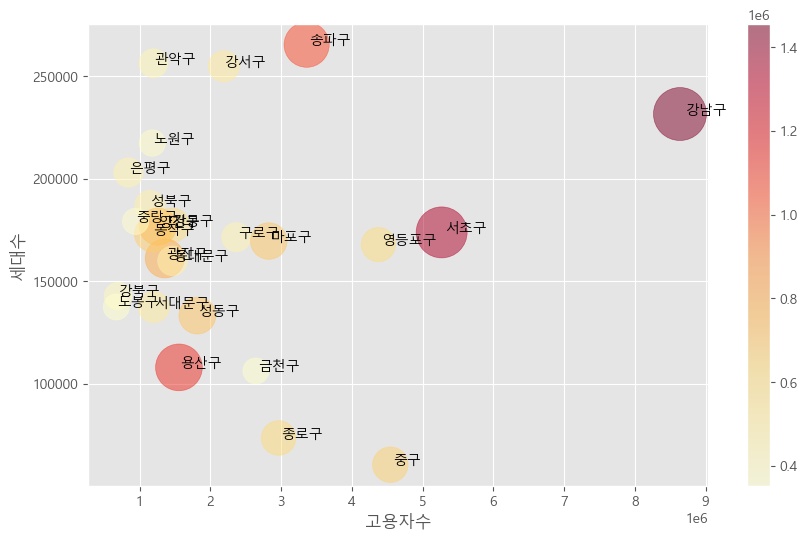

In [125]:
# [예제 4.44] 서울시의 고용자수, 세대수, 평균 아파트 매매가로 scatter 그래프 그리기(ch04/ 4.2 일자리.ipynb)

plt.figure(figsize=(10, 6))
plt.scatter(job_gugun['고용자수'], job_gugun['세대수'], c=job_gugun['평균매매가격'], s=pd.to_numeric(job_gugun['평균매매가격'])*0.001, cmap="YlOrRd", alpha=0.5)
plt.xlabel('고용자수')
plt.ylabel('세대수')

for name in job_gugun.index:
    plt.text(job_gugun['고용자수'][name]*1.01, job_gugun['세대수'][name], name)
    
plt.colorbar()
plt.show()

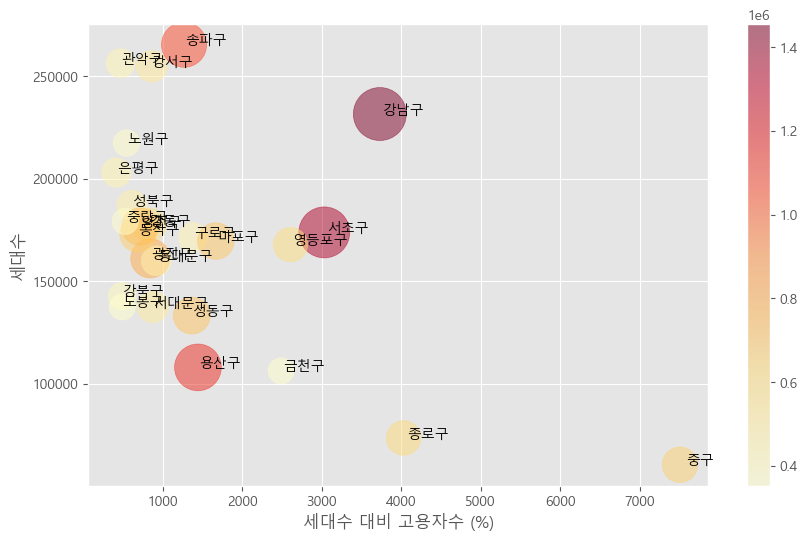

In [127]:
# [예제 4.45] 서울시의 고용비율, 세대수, 평균 아파트 매매가로 scatter 그래프 그리기

plt.figure(figsize=(10, 6))
plt.scatter(job_gugun['세대수대비고용'], job_gugun['세대수'], c=job_gugun['평균매매가격'], s=pd.to_numeric(job_gugun['평균매매가격'])*0.001, cmap="YlOrRd", alpha=0.5)
plt.xlabel('세대수 대비 고용자수 (%)')
plt.ylabel('세대수')

for name in job_gugun.index:
    plt.text(job_gugun['세대수대비고용'][name]*1.01, job_gugun['세대수'][name], name)
    
plt.colorbar()
plt.show()